# STAT8107 Data Mining Techniques
## Group Project

**Members (UID):**  
TBC

# Import modules and configuration

In [21]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from pyspark.sql import DataFrame

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

%matplotlib inline

# Functions

In [2]:
def print_missing_val_count(df: DataFrame):
    # Missing value counts
    df_na_cnt = df.isnull().sum()
    df_record_cnt = df.shape[0]
    
    # Print the count of missing value for each feature
    print("The following columns have missing values:")
    for col, na_cnt in zip(df_na_cnt.index, df_na_cnt.values):
        if na_cnt > 0:
            print(f"{col} has {na_cnt} ({100*na_cnt/df_record_cnt:0.1f}%) missing value.")

# Load Data

In [27]:
# Read csv files
price_train_df = pd.read_csv('trainPrice.csv')
price_test_df = pd.read_csv('testPrice.csv')
subway_df = pd.read_csv('Subways.csv')
school_df = pd.read_csv('Schools.csv')
submission_price_df = pd.read_csv('submissionPrice.csv')

## Input Files adn Their Basic Information

In [13]:
price_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 25 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   key                                 1601458 non-null  int64  
 1   apartment_id                        1601458 non-null  int64  
 2   city                                1601458 non-null  int64  
 3   transaction_year_month              1601458 non-null  int64  
 4   transaction_date                    1601458 non-null  object 
 5   year_of_completion                  1601458 non-null  int64  
 6   exclusive_use_area                  1601458 non-null  float64
 7   floor                               1601458 non-null  int64  
 8   latitude                            1601458 non-null  float64
 9   longitude                           1601458 non-null  float64
 10  address_by_law                      1601458 non-null  int64  
 11  total_parki

In [14]:
price_train_df.head(10)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,1111017400,902.0,585,5,14.0,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000
5,5,2815,1,200601,11~20,2000,84.92,9,37.575381,126.960804,1111018700,1365.0,964,12,23.0,10.0,individual,gas,5831,109.88,454,3.0,2.0,stairway,415000000
6,6,2815,1,200601,11~20,2000,60.00,13,37.575381,126.960804,1111018700,1365.0,964,12,23.0,10.0,individual,gas,5833,84.33,207,3.0,1.0,corridor,267000000
7,7,9867,1,200601,11~20,2005,84.76,10,37.559200,127.019503,1114016200,652.0,461,9,23.0,6.0,individual,gas,11862,104.30,82,3.0,2.0,stairway,415000000
8,8,2818,1,200601,11~20,1999,84.88,18,37.555060,127.014495,1114016200,2091.0,2282,19,20.0,8.0,individual,gas,5843,107.65,576,3.0,2.0,stairway,310000000
9,9,2817,1,200601,11~20,2002,59.94,12,37.549828,127.009284,1114016200,4329.0,5150,42,18.0,11.0,individual,gas,5842,85.90,864,3.0,1.0,corridor,319000000


In [15]:
price_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   key                                 3918 non-null   int64  
 1   apartment_id                        3918 non-null   int64  
 2   city                                3918 non-null   int64  
 3   transaction_year_month              3918 non-null   int64  
 4   transaction_date                    3918 non-null   object 
 5   year_of_completion                  3918 non-null   int64  
 6   exclusive_use_area                  3918 non-null   float64
 7   floor                               3918 non-null   int64  
 8   latitude                            3918 non-null   float64
 9   longitude                           3918 non-null   float64
 10  address_by_law                      3918 non-null   int64  
 11  total_parking_capacity_in_site      3547 no

In [16]:
price_test_df.head(10)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,462533,3751,1,200912,21~31,1984,83.580,14,37.519926,127.052515,1168010400,375.0,375,4,15.0,15.0,district,cogeneration,6648,107.19,2,3.0,1.0,corridor,0
1,764018,14029,1,201304,1~10,1968,107.170,10,37.572215,126.987643,1111013700,NaN,149,1,15.0,8.0,individual,gas,46184,107.17,10,0.0,0.0,corridor,0
2,813528,12304,1,201309,21~30,1968,36.170,6,37.570067,127.010640,1111017400,NaN,120,4,5.0,4.0,individual,gas,45540,39.66,58,2.0,1.0,stairway,0
3,845097,22241,1,201312,1~10,2007,45.670,8,37.556938,126.859255,1150010200,216.0,419,1,15.0,15.0,individual,gas,19069,87.11,1,3.0,2.0,stairway,0
4,856338,316,1,201401,1~10,1988,41.850,4,37.652256,127.082003,1135010600,NaN,210,2,5.0,5.0,individual,gas,704,56.70,90,2.0,1.0,stairway,0
5,977181,14140,1,201411,1~10,1972,124.500,7,37.544317,127.001489,1117013100,NaN,122,1,16.0,16.0,central,gas,46215,131.01,56,3.0,2.0,corridor,0
6,1037012,18263,1,201503,1~10,2008,84.468,1,37.645004,127.067781,1135010600,146.0,219,4,10.0,10.0,individual,gas,15040,116.40,74,3.0,2.0,stairway,0
7,1158117,1299,1,201510,21~31,1983,143.950,1,37.510144,127.011731,1165010600,NaN,112,1,14.0,14.0,district,cogeneration,26105,155.60,112,4.0,2.0,stairway,0
8,1204038,34895,1,201603,1~10,2010,84.780,24,37.573799,126.890999,1144012700,318.0,240,2,33.0,30.0,district,cogeneration,145659,118.60,58,2.0,2.0,stairway,0
9,1204146,710,1,201603,1~10,1989,59.220,8,37.633702,127.067866,1135010400,540.0,1880,15,15.0,6.0,central,gas,1901,85.12,106,3.0,1.0,corridor,0


In [28]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_code      1921 non-null   object 
 1   latitude         1921 non-null   float64
 2   longitude        1921 non-null   float64
 3   school_class     1921 non-null   object 
 4   operation_type   1921 non-null   object 
 5   highschool_type  462 non-null    object 
 6   gender           1921 non-null   object 
 7   foundation_date  1921 non-null   object 
 8   address_by_law   1921 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 135.2+ KB


In [18]:
school_df.head(10)

,school_code,latitude,longitude,school_class,operation_type,highschool_type,gender,foundation_date,address_by_law
0,S000003511,37.490880,127.015082,elementary,national,NaN,both,1953.1.31,1165010800
1,S000003563,37.577782,127.002915,elementary,national,NaN,both,1946.8.22,1111016800
2,S010000737,37.481366,127.059055,elementary,public,NaN,both,1982.9.20,1168010300
3,S010000738,37.485744,127.058002,elementary,public,NaN,both,1987.11.17,1168010300
4,S010000741,37.480805,127.051891,elementary,public,NaN,both,1983.11.30,1168010300
5,S010000742,37.508423,127.026187,elementary,public,NaN,both,1972.11.23,1168010800
6,S010000743,37.494398,127.065164,elementary,public,NaN,both,1981.9.9,1168010600
7,S010000744,37.492601,127.053554,elementary,public,NaN,both,1979.3.27,1168011800
8,S010000745,37.481135,127.086301,elementary,public,NaN,both,1994.8.5,1168011400
9,S010000746,37.464246,127.105618,elementary,public,NaN,both,1932.11.25,1168011100


In [19]:
subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   station_id      405 non-null    int64  
 1   latitude        405 non-null    float64
 2   longitude       405 non-null    float64
 3   subway_line     405 non-null    object 
 4   address_by_law  396 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 15.9+ KB


In [20]:
subway_df.head(10)

,station_id,latitude,longitude,subway_line,address_by_law
0,1,37.555729,126.972145,"1,4,KJ,AP",1.114012e+09
1,2,37.565624,126.976936,"1,2",1.114017e+09
2,3,37.570169,126.983099,1,1.111013e+09
3,4,37.571570,126.991895,"1,3,5",1.111016e+09
4,5,37.570988,127.001921,1,1.111016e+09
5,6,37.571256,127.009080,"1,4",NaN
6,7,37.576107,127.024536,"1,2,US",1.123010e+09
7,8,37.578196,127.034867,1,1.123010e+09
8,9,37.580166,127.044327,"1,KJ,KC",1.123011e+09
9,10,37.573246,127.016365,"1,6",1.111018e+09


In [13]:
submission_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   key                     3918 non-null   int64
 1   transaction_real_price  3918 non-null   int64
dtypes: int64(2)
memory usage: 61.3 KB


# Exploratory Data Analysis (EDA)

## Training Set (trainPrice.csv)

## Univariate Analysis

## Field - City

In [80]:
# Distinct values
price_train_df["city"].drop_duplicates().sort_values().to_list() # There are only 2 distinct values

[1, 0]

In [70]:
# Sample few (latitude, longitude) pairs from records with city = 0
price_train_df[price_train_df["city"] == 0][["latitude", "longitude"]].head(3)

,latitude,longitude
1491,35.117560,129.011018
1492,35.118632,129.010886
1493,35.081732,129.019474


In [68]:
# Sample few (latitude, longitude) pairs from records with city = 1
price_train_df[price_train_df["city"] == 1][["latitude", "longitude"]].head(3)

,latitude,longitude
0,37.585965,127.000231
1,37.585965,127.000231
2,37.580511,127.014016


## Field - transaction_real_price

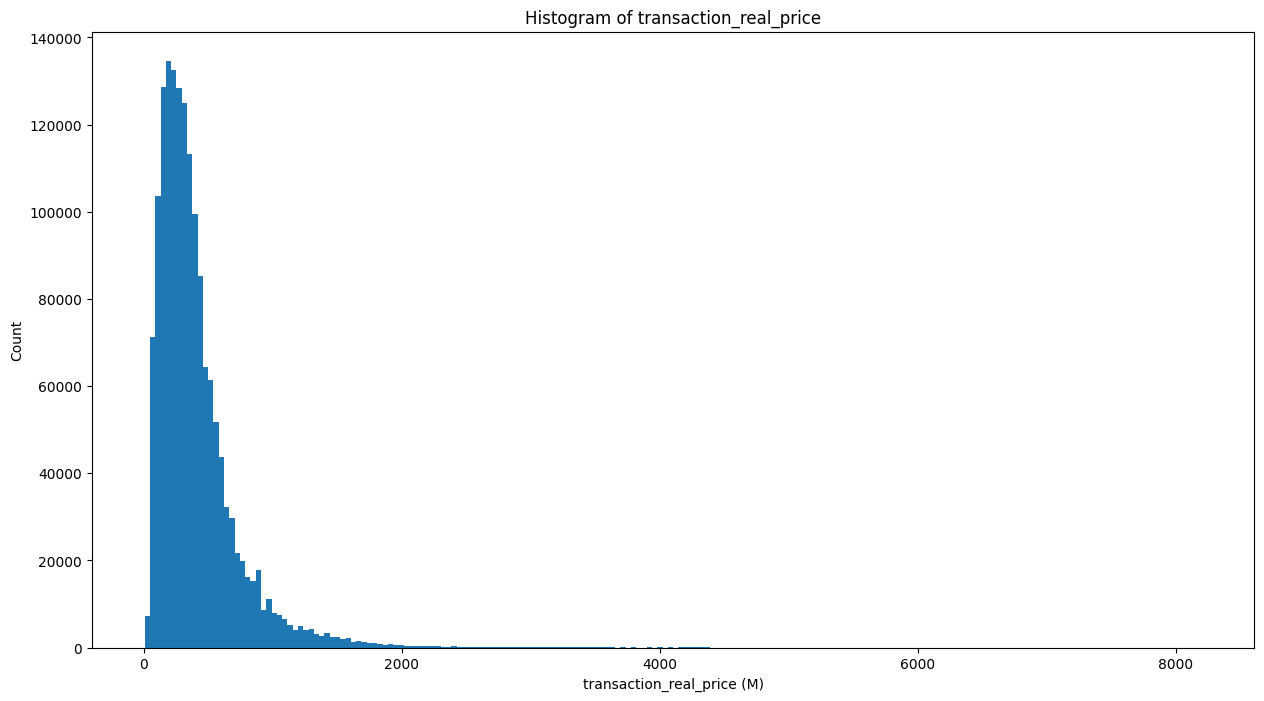

In [171]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.hist(price_train_df["transaction_real_price"]/1000000, bins=200)
plt.title('Histogram of transaction_real_price')
plt.xlabel('transaction_real_price (M)')
plt.ylabel('Count')
plt.show()

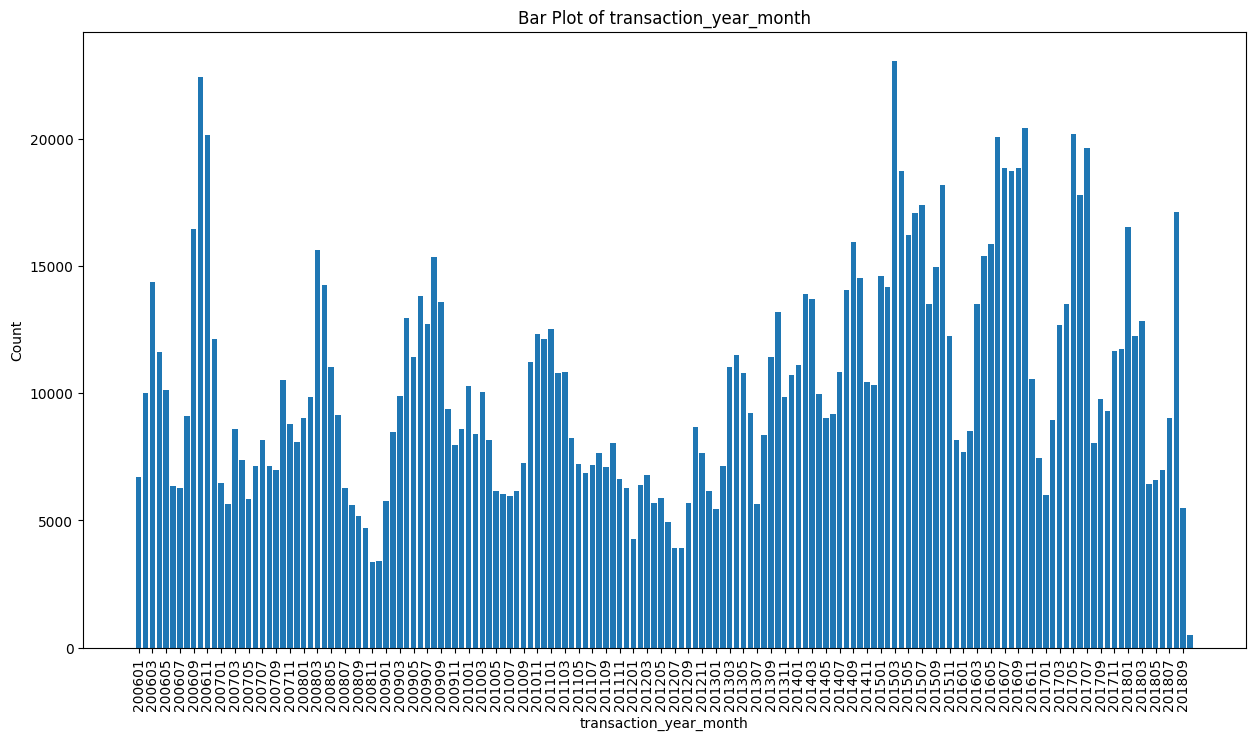

In [168]:
fig, ax = plt.subplots(figsize=(15, 8))
# Drop missing values (NA) and calculate the counts of each value
val_count = price_train_df["transaction_year_month"].astype("str").dropna().value_counts()
val_count = val_count.sort_index()
# Draw bar plot
plt.bar(val_count.index, val_count.values)
plt.title('Bar Plot of transaction_year_month')
plt.xlabel('transaction_year_month')
plt.ylabel('Count')
plt.xticks(range(len(val_count.index))[::2], val_count.index[::2], rotation=90)
plt.show()

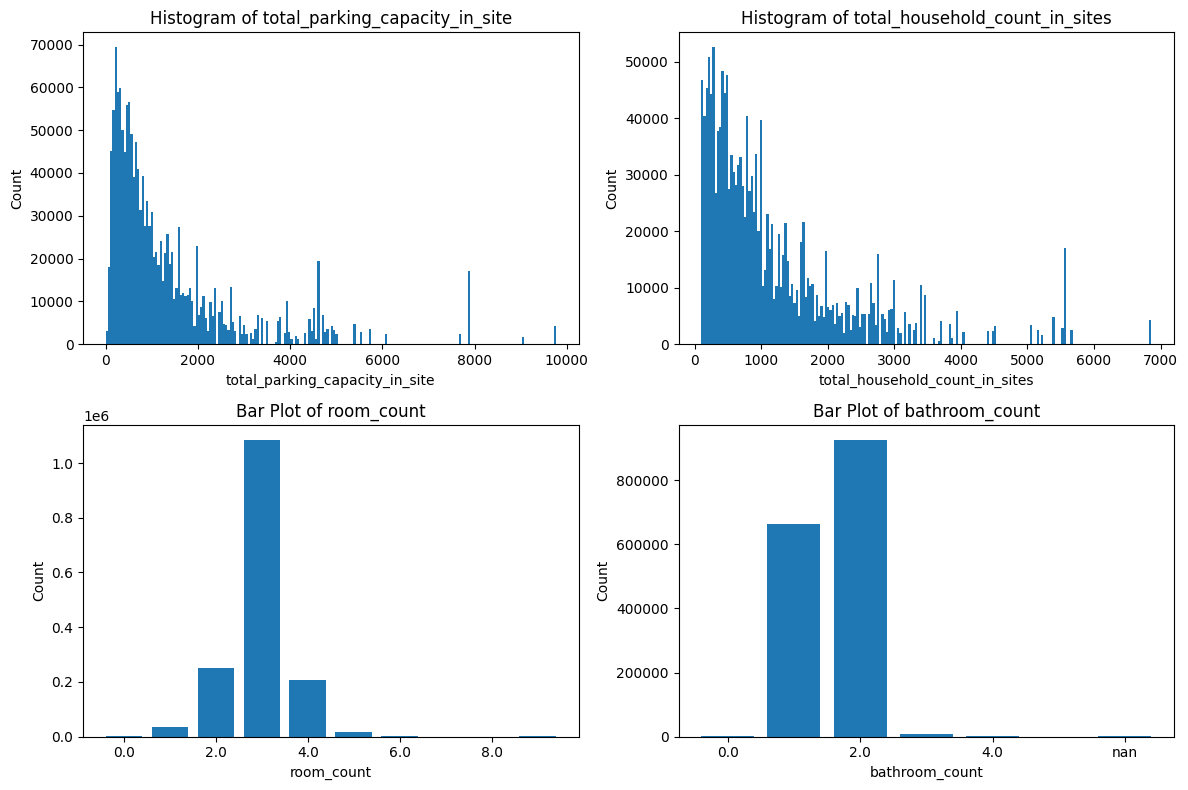

In [184]:
# Create a figure and add the axes for subgraphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#
axes[0,0].hist(price_train_df["total_parking_capacity_in_site"], bins=200)
axes[0,0].set(title='Histogram of total_parking_capacity_in_site')
axes[0,0].set_xlabel('total_parking_capacity_in_site')
axes[0,0].set_ylabel('Count')

# 
axes[0,1].hist(price_train_df["total_household_count_in_sites"], bins=200)
axes[0,1].set(title='Histogram of total_household_count_in_sites')
axes[0,1].set_xlabel('total_household_count_in_sites')
axes[0,1].set_ylabel('Count')

# 
# Drop missing values (NA) and calculate the counts of each value
val_count = price_train_df["room_count"].astype("str").dropna().value_counts()
val_count = val_count.sort_index()
# Draw bar plot
axes[1,0].bar(val_count.index, val_count.values)
axes[1,0].set(title='Bar Plot of room_count')
axes[1,0].set_xlabel('room_count')
axes[1,0].set_ylabel('Count')
axes[1,0].set(xticks=range(len(val_count.index))[::2],  xticklabels=val_count.index[::2])

# 
# Drop missing values (NA) and calculate the counts of each value
val_count = price_train_df["bathroom_count"].astype("str").dropna().value_counts()
val_count = val_count.sort_index()
# Draw bar plot
axes[1,1].bar(val_count.index, val_count.values)
axes[1,1].set(title='Bar Plot of bathroom_count')
axes[1,1].set_xlabel('bathroom_count')
axes[1,1].set_ylabel('Count')
axes[1,1].set(xticks=range(len(val_count.index))[::2],  xticklabels=val_count.index[::2])

plt.tight_layout()
plt.show()

In [71]:
price_train_df.head(10)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,1111017400,902.0,585,5,14.0,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000
5,5,2815,1,200601,11~20,2000,84.92,9,37.575381,126.960804,1111018700,1365.0,964,12,23.0,10.0,individual,gas,5831,109.88,454,3.0,2.0,stairway,415000000
6,6,2815,1,200601,11~20,2000,60.00,13,37.575381,126.960804,1111018700,1365.0,964,12,23.0,10.0,individual,gas,5833,84.33,207,3.0,1.0,corridor,267000000
7,7,9867,1,200601,11~20,2005,84.76,10,37.559200,127.019503,1114016200,652.0,461,9,23.0,6.0,individual,gas,11862,104.30,82,3.0,2.0,stairway,415000000
8,8,2818,1,200601,11~20,1999,84.88,18,37.555060,127.014495,1114016200,2091.0,2282,19,20.0,8.0,individual,gas,5843,107.65,576,3.0,2.0,stairway,310000000
9,9,2817,1,200601,11~20,2002,59.94,12,37.549828,127.009284,1114016200,4329.0,5150,42,18.0,11.0,individual,gas,5842,85.90,864,3.0,1.0,corridor,319000000


In [ ]:
subway_line_list = []
for subway_line in subway_df["subway_line"].drop_duplicates().tolist():
    subway_line_list += subway_line.split(",")

subway_line_list = list(set(subway_line_list))
subway_line_list.sort()
print(subway_line_list)

## Multivariate Analysis

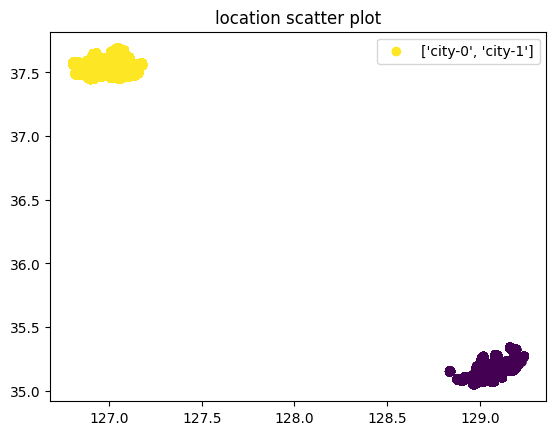

In [21]:
plt.scatter(price_train_df['longitude'], price_train_df['latitude'], c=price_train_df['city'], label=['city-0','city-1'])
plt.title('location scatter plot')
plt.legend()
plt.show()

## Missing Values and Outliers

In [24]:
print_missing_val_count(price_train_df)

The following columns have missing values:
total_parking_capacity_in_site has 91813 (5.7%) missing value.
tallest_building_in_sites has 9 (0.0%) missing value.
lowest_building_in_sites has 9 (0.0%) missing value.
heat_type has 2017 (0.1%) missing value.
heat_fuel has 9667 (0.6%) missing value.
room_count has 691 (0.0%) missing value.
bathroom_count has 691 (0.0%) missing value.
front_door_structure has 13892 (0.9%) missing value.


In [29]:
print_missing_val_count(price_test_df)

The following columns have missing values:
total_parking_capacity_in_site has 371 (9.5%) missing value.
tallest_building_in_sites has 1 (0.0%) missing value.
lowest_building_in_sites has 1 (0.0%) missing value.
heat_type has 28 (0.7%) missing value.
heat_fuel has 48 (1.2%) missing value.
room_count has 5 (0.1%) missing value.
bathroom_count has 5 (0.1%) missing value.
front_door_structure has 45 (1.1%) missing value.


In [30]:
print_missing_val_count(school_df)

The following columns have missing values:
highschool_type has 1459 (76.0%) missing value.


In [31]:
print_missing_val_count(subway_df)

The following columns have missing values:
address_by_law has 9 (2.2%) missing value.
